### Analysis

Evaluate different hyperparameters settings for MCTS:
- `iteration_budget`: budget of number of iterations (maybe also try time budget)
- `exploration_c`: exploration parameter for UCT

We evaluate the performance of MCTS on the two environments for different values of the hyperparameters `iteration_budget` and `exploration_c`. We average over 10 runs for each setting to get a more robust estimate of the performance. The hyperparam iter_budget is the number of iterations that MCTS is allowed to run each time it searches for the next action. The hyperparam exploration_c is the exploration parameter for the UCT value which is used in the tree policy for the Selection step.

#### Results for TTT

In [2]:
import gymnasium as gym
import gym_examples
from mcts import run_ttt_episode
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

ttt_env = gym.make('tictactoe-v0')
obs = ttt_env.reset()

In [3]:
nr_iterations = [10, 100, 500, 1000, 5000, 10000]
average_count = 10
rewards = np.zeros((len(nr_iterations), average_count))

for iter in nr_iterations:
    print("\nIteration budget: ", iter)
    for i in range(average_count):
        ttt_env.reset()
        reward = run_ttt_episode(ttt_env, obs, iter_budget=iter, render=False)
        rewards[nr_iterations.index(iter)][i] = reward
    print(iter, rewards[nr_iterations.index(iter)])


Iteration budget:  10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
Terminated: {'info': 'winning move player 2'}
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
Terminated {'info': 'drawn move player 1'}
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
Terminated: {'info': 'winning move player 2'}
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
Terminated {'info': 'winning move player 1'}
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
Terminated: {'info': 'drawn move player 2'}
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
Terminated: {'info': 'winning move player 2'}
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
MCTS Iteration 10/10
Terminated {'info': 'drawn move player 1'}
MCTS Iteration 10/10
MCTS Iteratio

Mean rewards: 
10 :  3.0
100 :  3.0
500 :  5.0
1000 :  3.0
5000 :  5.0
10000 :  4.0


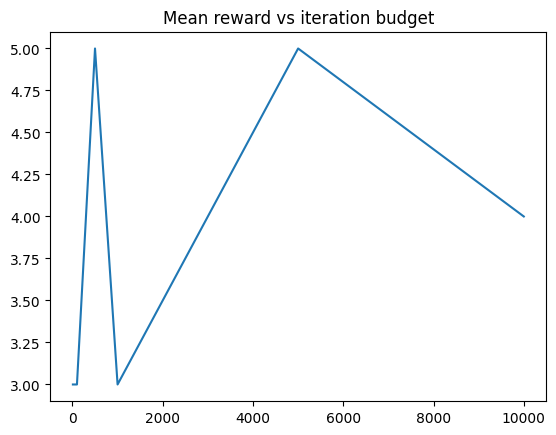

In [4]:
mean_rewards = np.mean(rewards, axis=1)
print("Mean rewards: ")
for iter in nr_iterations:
    print(iter, ": ", mean_rewards[nr_iterations.index(iter)])

# Plot results
plt.figure()
plt.plot(nr_iterations, mean_rewards)
plt.title("Mean reward vs iteration budget")
# save plot to file
plt.savefig("mcts_ttt.png")